# Data Preparation

This Jupyter Notebook demonstrates the steps in order to preprocess the data in order to use them after to train the models - algorithms


## 1. Importing Libraries


In [1]:
import numpy as np
import pandas as pd

## 2. Load initial dataset


In [2]:
data = pd.read_csv('real_data.csv')
data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


### Initial Information


In [3]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Remove any leading or trailing whitespace from string values in the data
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Print the shape of the dataset
print("Dataset shape:", data.shape)

# Print the unique emotions
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()

# Print the number of unique emotions
print("Number of unique emotions:", num_unique_emotions)

# Print the distribution of emotions
print("Emotion distribution:\n", data['Emotion'].value_counts())


Missing values in each column:
Emotion    0
RGB1_R     0
RGB1_G     0
RGB1_B     0
RGB2_R     0
RGB2_G     0
RGB2_B     0
RGB3_R     0
RGB3_G     0
RGB3_B     0
dtype: int64
Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy'
 'Fascinating' 'Luxurious' 'Mellow' 'Sweet' 'Cheerful' 'Childlike'
 'Joyful' 'Merry' 'Colourful' 'Brilliant' 'Pretty' 'Sunny' 'Generous'
 'Sweet and Dreamy' 'Sweet - Sour' 'Cute' 'Feminine'
 'Agreeable to the touch' 'Amiable' 'Innocent' 'Smooth' 'Gentle' 'Supple'
 'Soft' 'Charming' 'Gentle and Elegant' 'Mild' 'Genteed' 'Pleasant'
 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate' 'Nostalgic'
 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting' 'Diligent'
 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful' 'Elaborate'
 'Traditional' 'Substantial' 'Heavy and Deep' 'Old - Fashioned' 'Wild'
 'Serious' 'Strong and Robust' 'D

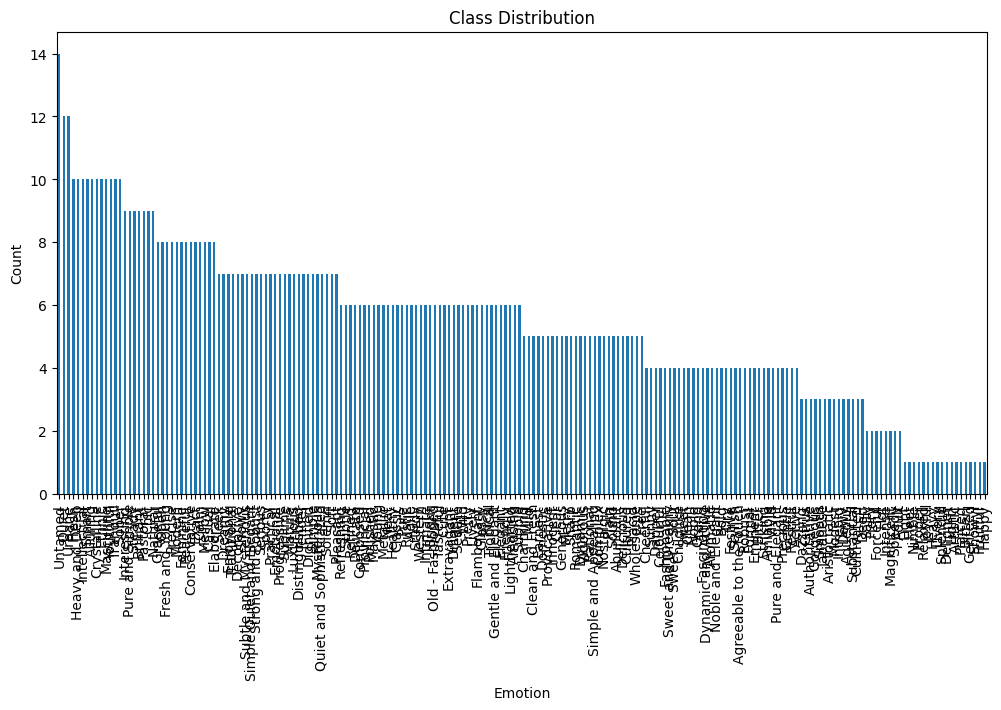

In [4]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### Remove Emotions like " Simple Quiet and Elegant "


In [5]:
# Remove emotions with more than one word
data['Emotion'] = data['Emotion'].apply(lambda x: x if len(x.split()) == 1 else '')

# Drop rows with empty 'Emotion' column
data = data[data['Emotion'] != '']

# Print dataset information
data.head()

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [6]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

Dataset shape: (968, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

### Check for duplicated Emotions


In [7]:
# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


Duplicate rows found:
          Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
4        Vigorous     229       0      13     255     242       0      12   
52       Pleasant     234     124     104     208     194     142     215   
56      Emotional     215     188     188     234     124     104     145   
59       Graceful     234     124     104     215     188     188     115   
101      Tropical     212       0      57     255     127       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
1000        Clear     153     215     179     255     255     255     204   
1001       Simple     222     222     222     255     255     255     123   
1002        Fresh     179     221      61     255     255     255     128   
1003  Crystalline     153     215     179     255     255     255     128   
1004         Chic     145     111      93     222     222     222     121   

      RGB3_G  RGB3_B  
4         32     120  
52    

### Remove duplicated Rows


In [8]:
# Remove duplicate rows keeping only the first occurrence
data = data.drop_duplicates(keep='first')

# Check for duplicate rows considering all columns
duplicate_rows = data[data.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
    print(f"Total number of duplicate rows: {len(duplicate_rows)}")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


### Information now


In [9]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())

# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

data.to_csv('cleaned_data1.csv', index=False)

Dataset shape: (918, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy' 'Fascinating' 'Luxurious'
 'Mellow' 'Sweet' 'Cheerful' 'Childlike' 'Joyful' 'Merry' 'Colourful'
 'Brilliant' 'Pretty' 'Sunny' 'Generous' 'Cute' 'Feminine' 'Amiable'
 'Innocent' 'Smooth' 'Gentle' 'Supple' 'Soft' 'Charming' 'Mild' 'Genteed'
 'Pleasant' 'Tender' 'Emotional' 'Casual' 'Graceful' 'Calm' 'Sedate'
 'Nostalgic' 'Japanese' 'Elegant' 'Sleek' 'Delicious' 'Interesting'
 'Diligent' 'Extravagant' 'Ethnic' 'Tasteful' 'Robust' 'Fruitful'
 'Elaborate' 'Traditional' 'Substantial' 'Wild' 'Serious' 'Dazzling'
 'Flamboyant' 'Abundant' 'Tropical' 'Enjoyable' 'Aromatic' 'Friendly'
 'Open' 'Lighthearted' 'Amusing' 'Healthy' 'Domestic' 'Restful' 'Intimate'
 'Free' 'Dreamy' 'Delicate' 'Dry' 'Natural' 'Wholesome' 'Provincial'
 'Placid' 'Modest' 'Chic' 'Aqueous' 'Sober' 'Classic' 'Rustic' 'Practical'
 'Grand' 'Pastoral' 'Sturdy' 'Conserv

In [10]:
import pandas as pd

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Load the data
data1 = pd.read_csv('cleaned_data1.csv')

print("Emotion distribution:\n", data1['Emotion'].value_counts())

Emotion distribution:
 Emotion
Untamed          14
Urbane           12
Ethnic           10
Tranquil         10
Intellectual     10
Youthful         10
Smart            10
Masculine        10
Alluring          9
Quiet             9
Sober             9
Chic              8
Conservative      8
Natural           8
Crystalline       8
Peaceful          8
Modern            8
Fresh             8
Steady            8
Interesting       8
Casual            8
Exact             8
Elaborate         8
Mellow            8
Brilliant         8
Precise           8
Open              7
Pastoral          7
Dignified         7
Serious           7
Traditional       7
Sublime           7
Luxurious         7
Mature            7
Sleek             7
Calm              7
Graceful          7
Practical         7
Enjoyable         7
Solemn            7
Distinguished     7
Feminine          7
Progressive       7
Soft              7
Sporty            7
Decorative        7
Delicate          6
Refreshing        6
Polished 

#### Count the number of occurrences of each distinct emotion


In [27]:
data1 = pd.read_csv('cleaned_data1.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data1['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data1['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Untamed          14
Urbane           12
Ethnic           10
Tranquil         10
Intellectual     10
Youthful         10
Smart            10
Masculine        10
Alluring          9
Quiet             9
Sober             9
Chic              8
Conservative      8
Natural           8
Crystalline       8
Peaceful          8
Modern            8
Fresh             8
Steady            8
Interesting       8
Casual            8
Exact             8
Elaborate         8
Mellow            8
Brilliant         8
Precise           8
Open              7
Pastoral          7
Dignified         7
Serious           7
Traditional       7
Sublime           7
Luxurious         7
Mature            7
Sleek             7
Calm              7
Graceful          7
Practical         7
Enjoyable         7
Solemn            7
Distinguished     7
Feminine          7
Progressive       7
Soft              7
Sporty            7
Decorative        7
Delicate          6
Refreshing        6
Polished

Emotion
Untamed         14
Urbane          12
Ethnic          10
Tranquil        10
Intellectual    10
Name: count, dtype: int64

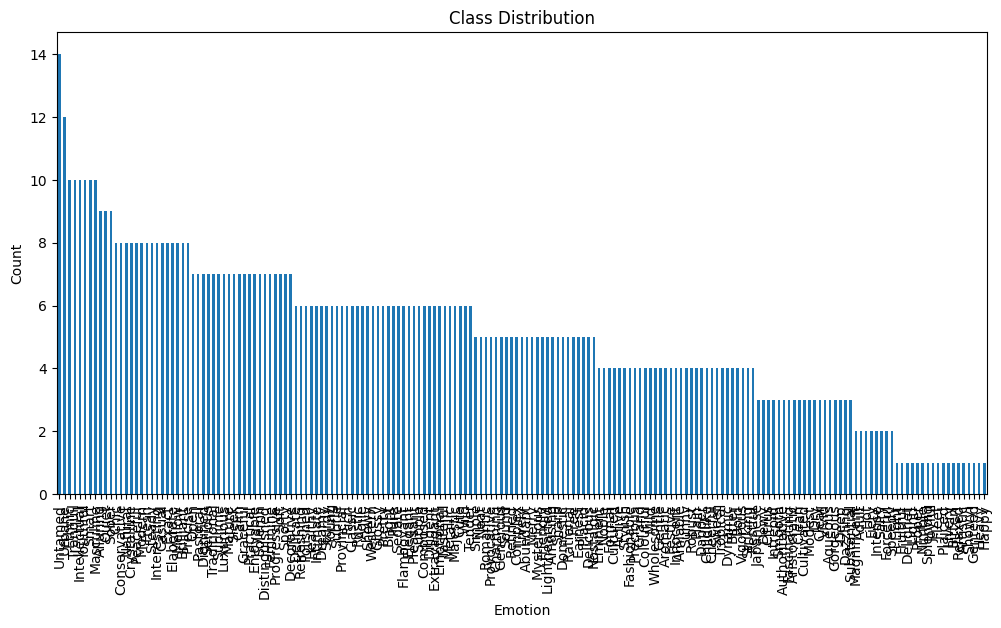

In [28]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data1['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Add in a new csv the Different Emotions with the same set of RGB and also the "and" Emotions ξεχωριστά in the "increase_data.csv"


In [1]:
import pandas as pd

# Read the CSV file
data2 = pd.read_csv('increase_data.csv')

# Check for duplicated rows
duplicates = data2.duplicated()
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows before removal:")
    print(data2[duplicates])
    
    # Remove duplicates, keeping the first occurrence
    data2_deduped = data2.drop_duplicates()
    
    # Save the deduplicated data back to the same CSV file
    data2_deduped.to_csv('increase_data.csv', index=False)
    
    print(f"\nRemoved {num_duplicates} duplicate rows.")
    print(f"Original shape: {data2.shape}")
    print(f"New shape: {data2_deduped.shape}")
    
    # Use the deduplicated data for further analysis
    data2 = data2_deduped
else:
    print("No duplicate rows found.")

# Rest of your original code
emotion_counts = data2['Emotion'].value_counts()
print("\nCounts of each emotion:")
print(emotion_counts)

distinct_emotion_count = data2['Emotion'].nunique()
print("\nNumber of distinct emotions:")
print(distinct_emotion_count)

total_samples = len(data2)
print("\nTotal number of samples:")
print(total_samples)

print("\nTop emotions by count:")
print(emotion_counts.head())

Number of duplicate rows: 1

Duplicate rows before removal:
    Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  RGB3_G  \
438  Simple     207     179     215     242     242     242     166     181   

     RGB3_B  
438     183  

Removed 1 duplicate rows.
Original shape: (963, 10)
New shape: (962, 10)

Counts of each emotion:
Emotion
Untamed     14
Simple      14
Urbane      12
Fresh       11
Young       11
            ..
Livery       1
Joyful       1
Fruitful     1
Relaxed      1
Happy        1
Name: count, Length: 182, dtype: int64

Number of distinct emotions:
182

Total number of samples:
962

Top emotions by count:
Emotion
Untamed    14
Simple     14
Urbane     12
Fresh      11
Young      11
Name: count, dtype: int64


#### Plot the distribution for each Emotion after the changes


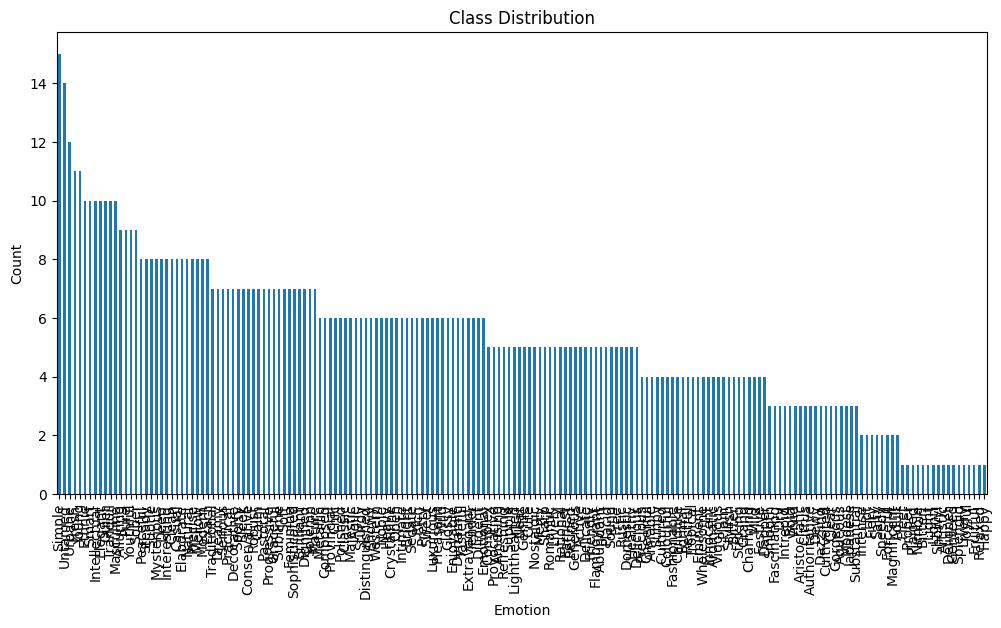

In [15]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data2['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Multiplied RGB positions in order to increase the number of the samples - for the minority classes

which are all the classes with less than 5 samples


In [40]:
import pandas as pd

# Target emotions definitions (unchanged)
target_emotions_1 = ['Fleet', 'Proper', 'Plaiced', 'Nimble', 'Bitterl', 'Light', 'Lightl', 'Showyl', 'Artistic', 'Delignet', 'Genteed', 'Splendid', 'Livery', 'Joyful', 'Fruitful', 'Relaxed', 'Happy','Intense', 'Hot', 'Fiery', 'Salty', 'Speedy', 'Forceful', 'Magnificent', 'Adult']
target_emotions_2 = ['Smooth', 'Fascinating', 'Dry', 'Intrepid', 'Bold', 'Vivid', 'Aristocratic', 'Citrus', 'Authoritative', 'Dewy', 'Dazzling', 'Cultivated', 'Clear', 'Gorgeous', 'Aqueous', 'Modest', 'Japanese', 'Substantial']
target_emotions_3 = ['Precious', 'Cheerful', 'Amiable', 'Sunny', 'Cultured', 'Colourful', 'Fashionable', 'Childlike', 'Formal', 'Restful', 'Tropical', 'Eminent', 'Wholesome', 'Innocent', 'Aromatic', 'Vigorous', 'Plain', 'Stylish', 'Bitter', 'Striking', 'Grand', 'Charming', 'Mild', 'Festive', 'Dapper' , 'Complex' , 'Provocative' , 'Amusing' , 'Refreshing' , 'Supple' , 'Lighthearted' , 'Neat' , 'Gentle' , 'Cute' , 'Nostalgic' , 'Merry' , 'Sharp' , 'Romantic' , 'Lively' , 'Rational' , 'Earnest' , 'Refined' , 'Generous' , 'Active' , 'Delicate' , 'Friendly' , 'Flamboyant' , 'Abundant' , 'Placid' , 'Sound' , 'Free' , 'Rustic' , 'Domestic' , 'Healthy' , 'Delicious']
target_emotions_4 = ['Traditional', 'Dreamy', 'Serious', 'Practical', 'Decorative', 'Sporty', 'Sleek', 'Conservative', 'Robust', 'Calm', 'Pastoral', 'Progressive', 'Graceful', 'Sublime', 'Soft', 'Feminine', 'Sophisticated', 'Brilliant', 'Dignified', 'Solemn', 'Mature', 'Metallic', 'Composed', 'Provincial', 'Chic', 'Polished', 'Classic', 'Majestic', 'Agile', 'Sturdy', 'Distinguished', 'Showy', 'Western', 'Noble', 'Heavy', 'Crystalline', 'Open', 'Intimate', 'Bright', 'Sedate', 'Rich', 'Pretty', 'Sweet', 'Luxurious', 'Pleasant', 'Wild', 'Glossy', 'Enjoyable', 'Dynamic', 'Tasteful', 'Extravagant', 'Tender', 'Diligent', 'Emotional']

# Read the dataset
data = pd.read_csv('increase_data.csv')

# Create a list to store new rows
new_rows = []

# Function to create new combinations
def create_combinations(emotion, rgb1, rgb2, rgb3, emotions_set):
    if emotions_set == 1:
        return [
            [emotion] + rgb3 + rgb2 + rgb1,
            [emotion] + rgb3 + rgb1 + rgb2,
            [emotion] + rgb2 + rgb3 + rgb1,
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 2:
        return [
            [emotion] + rgb2 + rgb3 + rgb1,
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 3:
        return [
            [emotion] + rgb1 + rgb3 + rgb2,
            [emotion] + rgb2 + rgb1 + rgb3
        ]
    elif emotions_set == 4:
        return [
            [emotion] + rgb2 + rgb1 + rgb3
        ]

# Modify the rows for all sets of target emotions
for index, row in data.iterrows():
    emotion = row['Emotion']
    rgb1 = [row['RGB1_R'], row['RGB1_G'], row['RGB1_B']]
    rgb2 = [row['RGB2_R'], row['RGB2_G'], row['RGB2_B']]
    rgb3 = [row['RGB3_R'], row['RGB3_G'], row['RGB3_B']]
    
    if emotion in target_emotions_1:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 1))
    elif emotion in target_emotions_2:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 2))
    elif emotion in target_emotions_3:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 3))
    elif emotion in target_emotions_4:
        new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3, 4))

# Create a DataFrame from the new rows
new_data = pd.DataFrame(new_rows, columns=['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Concatenate the original data with the new data
combined_data = pd.concat([data, new_data], ignore_index=True)

# Save the modified dataset to a new CSV file
combined_data.to_csv('6samples.csv', index=False)

#### Do Data check like in the previous datasets to be sure it's ok !


In [41]:
data3 = pd.read_csv('6samples.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data3['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data3['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

Counts of each emotion:
Emotion
Friendly         15
Lighthearted     15
Supple           15
Gentle           15
Sharp            15
Active           15
Flamboyant       15
Abundant         15
Cute             15
Generous         15
Provocative      15
Simple           15
Complex          15
Nostalgic        15
Merry            15
Romantic         15
Amusing          15
Refreshing       15
Delicious        15
Domestic         15
Free             15
Rational         15
Neat             15
Delicate         15
Earnest          15
Healthy          15
Refined          15
Placid           15
Lively           15
Sound            15
Rustic           15
Traditional      14
Sophisticated    14
Robust           14
Pastoral         14
Progressive      14
Serious          14
Solemn           14
Dreamy           14
Decorative       14
Sporty           14
Practical        14
Sleek            14
Conservative     14
Mature           14
Dignified        14
Brilliant        14
Feminine         14
Untamed 

Emotion
Friendly        15
Lighthearted    15
Supple          15
Gentle          15
Sharp           15
Name: count, dtype: int64

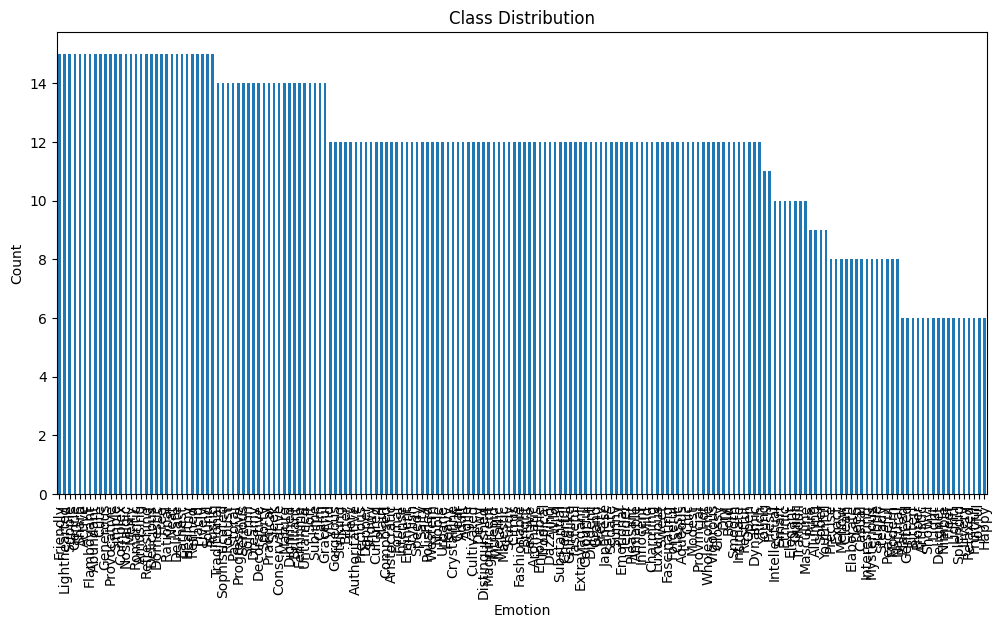

In [42]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data3['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### x6perfect.csv

#### Multiplied RGB positions in order to increase the number of the samples - for ALL the classes


In [2]:
import pandas as pd

# Read the dataset
data = pd.read_csv('increase_data.csv')

# Function to create new combinations
def create_combinations(emotion, rgb1, rgb2, rgb3):
    return [
        [emotion] + rgb1 + rgb3 + rgb2,
        [emotion] + rgb2 + rgb1 + rgb3,
        [emotion] + rgb2 + rgb3 + rgb1,
        [emotion] + rgb3 + rgb1 + rgb2,
        [emotion] + rgb3 + rgb2 + rgb1
    ]

# Create a list to store new rows
new_rows = []

# Modify the rows for all samples
for index, row in data.iterrows():
    emotion = row['Emotion']
    rgb1 = [row['RGB1_R'], row['RGB1_G'], row['RGB1_B']]
    rgb2 = [row['RGB2_R'], row['RGB2_G'], row['RGB2_B']]
    rgb3 = [row['RGB3_R'], row['RGB3_G'], row['RGB3_B']]
    
    # Create new combinations for each sample
    new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3))

# Create a DataFrame from the new rows
new_data = pd.DataFrame(new_rows, columns=['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Concatenate the original data with the new data
combined_data = pd.concat([data, new_data], ignore_index=True)

# Save the modified dataset to a new CSV file
combined_data.to_csv('x6perfect.csv', index=False)

print(f"Original data shape: {data.shape}")
print(f"New data shape: {new_data.shape}")
print(f"Combined data shape: {combined_data.shape}")

Original data shape: (962, 10)
New data shape: (4810, 10)
Combined data shape: (5772, 10)


### Check for duplicated rows about the x6perfect csv


In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('x6perfect.csv')

# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Sort duplicates to group them together
duplicates_sorted = duplicates.sort_values(by=list(df.columns))

# Print duplicated rows with line numbers
print("Duplicated Rows:")
for index, row in duplicates_sorted.iterrows():
    duplicate_indices = df[df.duplicated(subset=df.columns, keep=False) & (df == row).all(axis=1)].index
    print(f"Value in line {index + 2} is duplicated in line(s): {', '.join(map(str, [i + 2 for i in duplicate_indices if i != index]))}")
    print(row)
    print()

# Print the count of duplicated rows
print(f"Number of duplicated rows: {len(duplicates)}")

# Remove duplicates, keeping the last occurrence
df_cleaned = df.drop_duplicates(keep='last')

# Print the shape of the original and cleaned dataframes
print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('x6perfect_cleaned.csv', index=False)
print("Cleaned data saved to 'x6perfect_cleaned.csv'")

Duplicated Rows:
Value in line 2202 is duplicated in line(s): 3359
Emotion    Bitter
RGB1_R          1
RGB1_G         24
RGB1_B         10
RGB2_R         89
RGB2_G         55
RGB2_B          8
RGB3_R        126
RGB3_G        100
RGB3_B         12
Name: 2200, dtype: object

Value in line 3359 is duplicated in line(s): 2202
Emotion    Bitter
RGB1_R          1
RGB1_G         24
RGB1_B         10
RGB2_R         89
RGB2_G         55
RGB2_B          8
RGB3_R        126
RGB3_G        100
RGB3_B         12
Name: 3357, dtype: object

Value in line 481 is duplicated in line(s): 2203
Emotion    Bitter
RGB1_R          1
RGB1_G         24
RGB1_B         10
RGB2_R        126
RGB2_G        100
RGB2_B         12
RGB3_R         89
RGB3_G         55
RGB3_B          8
Name: 479, dtype: object

Value in line 2203 is duplicated in line(s): 481
Emotion    Bitter
RGB1_R          1
RGB1_G         24
RGB1_B         10
RGB2_R        126
RGB2_G        100
RGB2_B         12
RGB3_R         89
RGB3_G         55
RGB

In [6]:
data4 = pd.read_csv('increase_data.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data4['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

data5 = pd.read_csv('x6perfect.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data5['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

Counts of each emotion:
Emotion
Simple      15
Untamed     14
Urbane      12
Fresh       11
Young       11
            ..
Livery       1
Joyful       1
Fruitful     1
Relaxed      1
Happy        1
Name: count, Length: 182, dtype: int64
Counts of each emotion:
Emotion
Untamed     84
Simple      81
Urbane      72
Fresh       66
Young       66
            ..
Relaxed      6
Showyl       6
Joyful       6
Fruitful     6
Happy        6
Name: count, Length: 182, dtype: int64


#### Oversampling using SMOTE for the 6samples.csv file


Initial class distribution:
Counter({'Lively': 15, 'Merry': 15, 'Generous': 15, 'Cute': 15, 'Gentle': 15, 'Supple': 15, 'Nostalgic': 15, 'Delicious': 15, 'Flamboyant': 15, 'Abundant': 15, 'Friendly': 15, 'Lighthearted': 15, 'Amusing': 15, 'Healthy': 15, 'Domestic': 15, 'Free': 15, 'Delicate': 15, 'Placid': 15, 'Rustic': 15, 'Sound': 15, 'Complex': 15, 'Provocative': 15, 'Active': 15, 'Refreshing': 15, 'Simple': 15, 'Neat': 15, 'Sharp': 15, 'Romantic': 15, 'Rational': 15, 'Earnest': 15, 'Refined': 15, 'Mature': 14, 'Untamed': 14, 'Brilliant': 14, 'Feminine': 14, 'Soft': 14, 'Graceful': 14, 'Calm': 14, 'Sleek': 14, 'Robust': 14, 'Traditional': 14, 'Serious': 14, 'Dreamy': 14, 'Practical': 14, 'Pastoral': 14, 'Conservative': 14, 'Sporty': 14, 'Decorative': 14, 'Solemn': 14, 'Progressive': 14, 'Sophisticated': 14, 'Dignified': 14, 'Sublime': 14, 'Bright': 12, 'Festive': 12, 'Hot': 12, 'Vigorous': 12, 'Bold': 12, 'Forceful': 12, 'Dynamic': 12, 'Rich': 12, 'Glossy': 12, 'Fascinating': 12, 'L

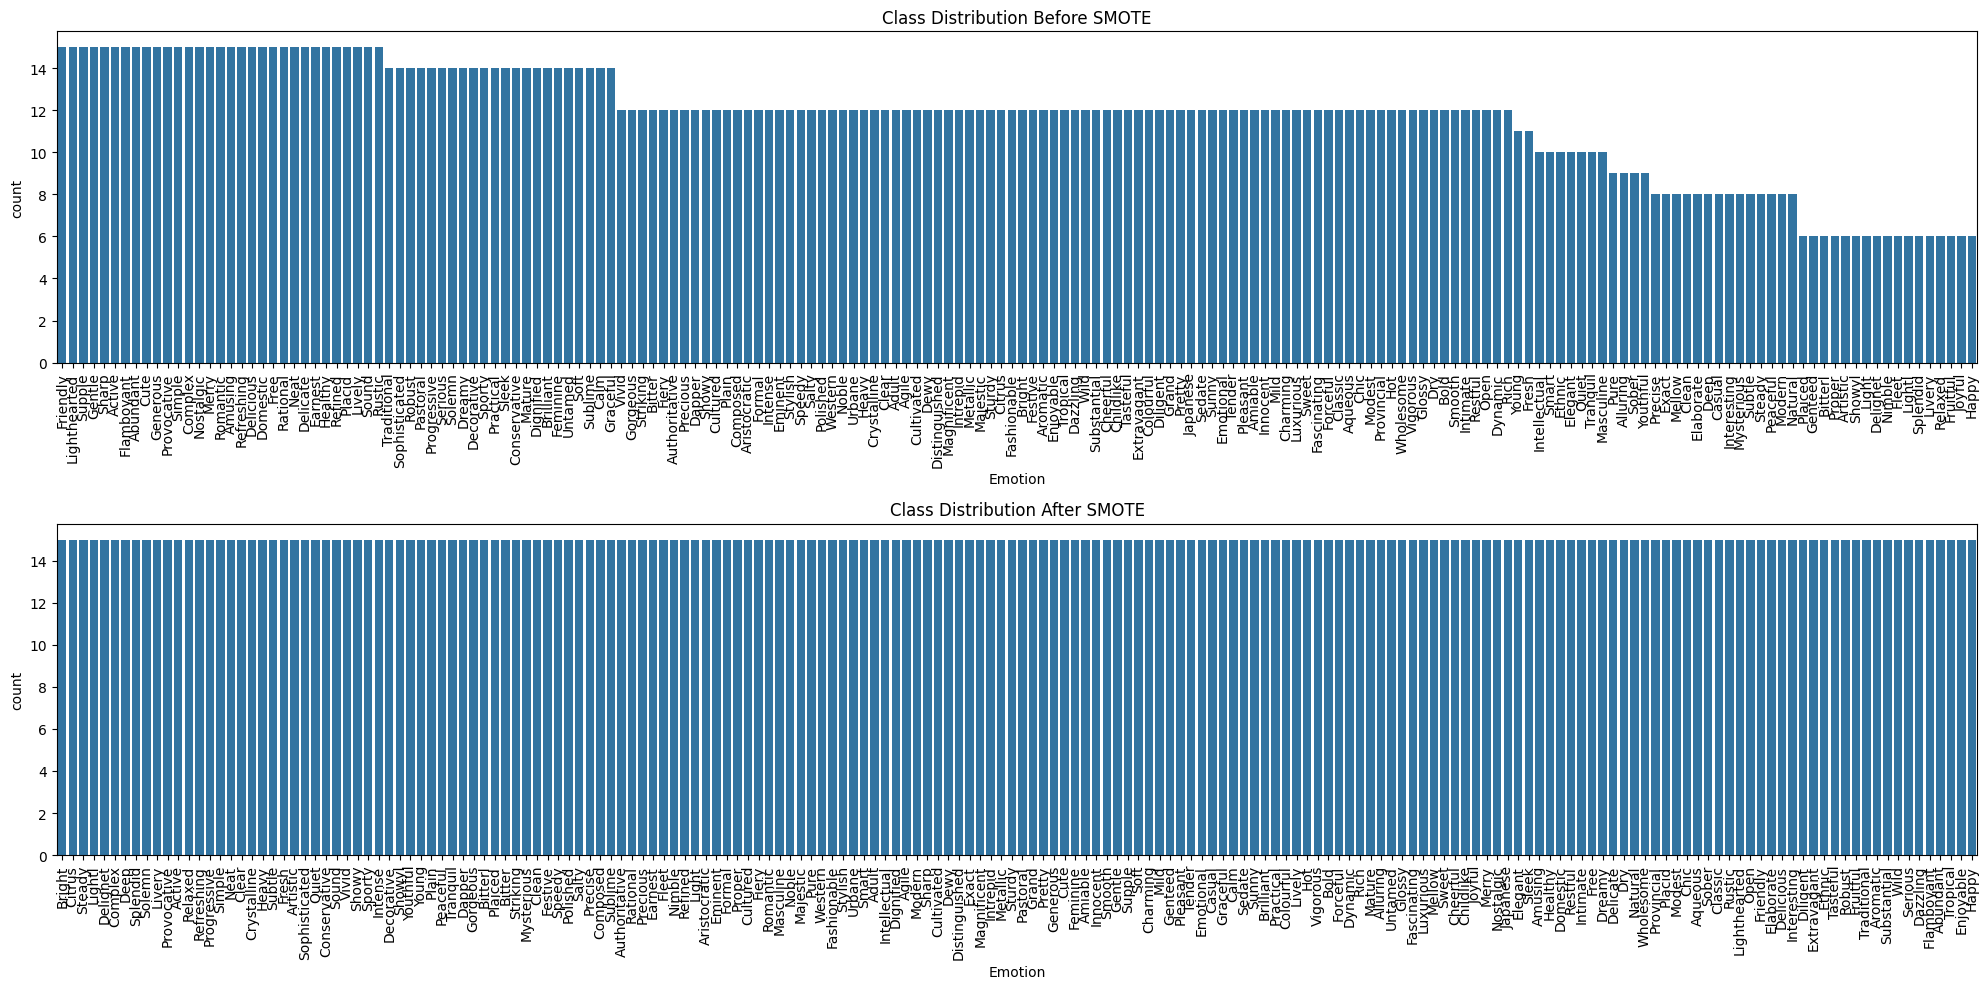

In [45]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('6samples.csv')

# Separate features and target
X = df.drop('Emotion', axis=1)  # Features
y = df['Emotion']  # Target

# Print the initial class distribution
print("Initial class distribution:")
print(Counter(y))

# Apply SMOTE with fewer neighbors
smote = SMOTE(k_neighbors=1)  # Adjust based on your minimum class size
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Emotion')], axis=1)

# Save the resampled dataset to a new CSV file
df_resampled.to_csv('resampled_dataset.csv', index=False)

# Plot the class distribution before and after SMOTE
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=y_resampled, order=y_resampled.value_counts().index)
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

### Check for douplicated rows before doing SMOTE in the x6perfect_cleaned.csv


In [7]:
import pandas as pd

# Load the dataset
file_path = 'x6perfect_cleaned.csv'
df = pd.read_csv(file_path)

# Get the total number of rows
total_rows = len(df)

# Check for exact duplicates across all columns
duplicates = df.duplicated(keep=False)
num_duplicates = duplicates.sum()

# Print the results
print(f"Total rows in the dataset: {total_rows}")
print(f"Number of exact duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nExact duplicate rows found:")
    duplicate_rows = df[duplicates].sort_values(by=df.columns.tolist())
    print(duplicate_rows)
    
    # Get counts of each duplicate row
    duplicate_counts = duplicate_rows.groupby(df.columns.tolist()).size().reset_index(name='count')
    duplicate_counts = duplicate_counts.sort_values('count', ascending=False)
    
    print("\nCounts of each exact duplicate row:")
    print(duplicate_counts)
    
    # Optional: Save duplicates to a new CSV file
    duplicate_rows.to_csv('exact_duplicate_rows.csv', index=False)
    print("\nExact duplicate rows have been saved to 'exact_duplicate_rows.csv'")
else:
    print("\nNo exact duplicate rows found in the dataset.")

# Additional check for rows with same values but different emotions
value_columns = [col for col in df.columns if col != 'Emotion']
value_duplicates = df.duplicated(subset=value_columns, keep=False)
num_value_duplicates = value_duplicates.sum()

if num_value_duplicates > num_duplicates:
    print(f"\nFound {num_value_duplicates - num_duplicates} rows with identical values but different emotions:")
    value_duplicate_rows = df[value_duplicates & ~duplicates].sort_values(by=value_columns)
    print(value_duplicate_rows)

Total rows in the dataset: 5562
Number of exact duplicate rows: 0

No exact duplicate rows found in the dataset.

Found 216 rows with identical values but different emotions:
        Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
2690    Dynamic       0       0       0       1     144     102     229   
3253   Vigorous       0       0       0       1     144     102     229   
5423      Exact       0       0       0      10      21      82     127   
5435  Dignified       0       0       0      10      21      82     127   
1242    Untamed       0       0       0      14      57      21     138   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1727      Vivid     255     242       0     255     127       0     212   
3824      Smart     255     255     255     128     166     206     153   
4175      Clear     255     255     255     128     166     206     153   
3825      Smart     255     255     255     153     216     212     128   


### Some info about the x6perfect_cleaned.csv file beofre oversampling it


In [3]:
import pandas as pd

data4 = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')

# Count the number of occurrences of each distinct emotion
emotion_counts = data4['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data4['Emotion'].nunique()

# Get the names of distinct emotions
distinct_emotions = data4['Emotion'].unique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

emotion_counts.head()

print("\nNames of distinct emotions:")
for emotion in distinct_emotions:
    print(emotion)

Counts of each emotion:
Emotion
Untamed     84
Simple      81
Urbane      72
Fresh       66
Young       66
            ..
Relaxed      6
Showyl       6
Joyful       6
Fruitful     6
Happy        6
Name: count, Length: 182, dtype: int64
Number of distinct emotions:
182

Names of distinct emotions:
Bright
Festive
Lively
Hot
Vigorous
Bold
Forceful
Dynamic
Rich
Mature
Alluring
Untamed
Glossy
Fascinating
Luxurious
Mellow
Sweet
Cheerful
Childlike
Joyful
Merry
Colourful
Pretty
Sunny
Generous
Cute
Feminine
Amiable
Innocent
Smooth
Gentle
Supple
Soft
Charming
Mild
Genteed
Pleasant
Tender
Emotional
Casual
Graceful
Calm
Sedate
Nostalgic
Japanese
Elegant
Sleek
Interesting
Diligent
Extravagant
Ethnic
Robust
Fruitful
Elaborate
Substantial
Wild
Serious
Dazzling
Flamboyant
Abundant
Tropical
Enjoyable
Delicious
Aromatic
Friendly
Open
Lighthearted
Amusing
Healthy
Domestic
Restful
Intimate
Free
Dreamy
Delicate
Dry
Natural
Wholesome
Provincial
Placid
Modest
Chic
Aqueous
Sober
Classic
Traditional
Practical


### FINAL Dataset - Oversampling using SMOTE for the x6perfect_cleaned.csv

#### Simple SMOTE - basic implementation


Initial class distribution (training set):
Counter({'Untamed': 67, 'Simple': 65, 'Urbane': 57, 'Fresh': 53, 'Young': 53, 'Tranquil': 48, 'Ethnic': 48, 'Smart': 48, 'Elegant': 48, 'Sober': 43, 'Youthful': 43, 'Alluring': 43, 'Pure': 43, 'Quiet': 43, 'Subtle': 38, 'Clean': 38, 'Mellow': 38, 'Exact': 38, 'Intellectual': 38, 'Elaborate': 38, 'Masculine': 38, 'Natural': 38, 'Interesting': 38, 'Casual': 38, 'Mysterious': 36, 'Deep': 36, 'Decorative': 34, 'Dignified': 34, 'Modern': 34, 'Precise': 34, 'Calm': 34, 'Sporty': 34, 'Robust': 34, 'Steady': 34, 'Conservative': 34, 'Serious': 34, 'Practical': 34, 'Solemn': 34, 'Sleek': 34, 'Sophisticated': 34, 'Graceful': 34, 'Soft': 33, 'Peaceful': 33, 'Pastoral': 33, 'Traditional': 29, 'Sweet': 29, 'Composed': 29, 'Pretty': 29, 'Provincial': 29, 'Glossy': 29, 'Classic': 29, 'Extravagant': 29, 'Majestic': 29, 'Western': 29, 'Sturdy': 29, 'Chic': 29, 'Open': 29, 'Noble': 29, 'Bright': 29, 'Progressive': 29, 'Pleasant': 29, 'Enjoyable': 29, 'Mature': 2

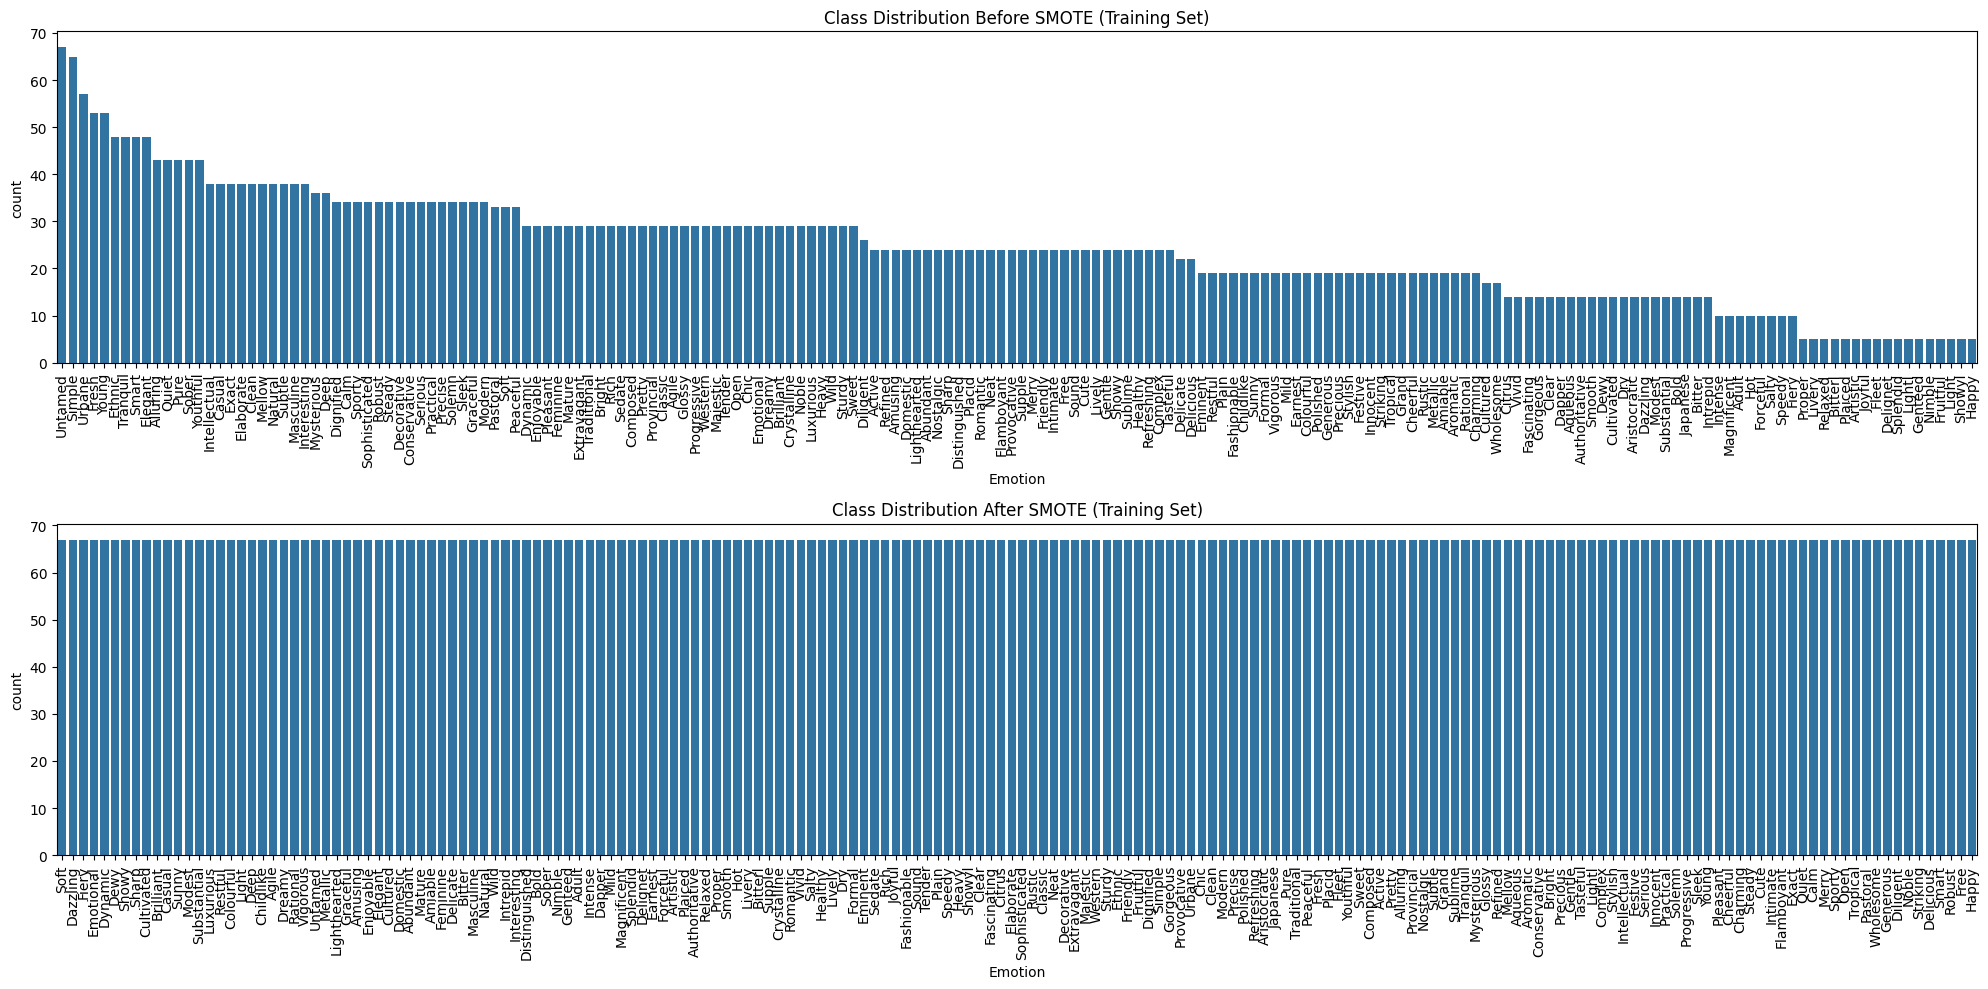


Number of samples in original dataset: 5562
Number of samples in training set before SMOTE: 4449
Number of samples in training set after SMOTE: 12194
Number of samples in final dataset (after removing duplicates): 12141
Number of samples in test set: 1113

First few lines of the saved CSV file:
 RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  RGB3_G  RGB3_B     Emotion
    230     245     164     253     217     205     217     228     228        Soft
     32     104     113     179     204     206     121     123     131       Sober
     53      21       3      89      55       8      32      10      70 Traditional
    103     124     100     208     194     142     161     161     161    Peaceful
    255     255     255     192     230     184     145     209     127       Fresh


In [8]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from imblearn.over_sampling import SMOTE  # For oversampling minority classes
from collections import Counter  # For counting class frequencies
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling (not used in this version)

# Load the dataset from a CSV file
df = pd.read_csv('x6perfect_cleaned.csv')

# Remove any duplicate rows to ensure data integrity
df.drop_duplicates(inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Emotion', axis=1)  # All columns except 'Emotion' are features
y = df['Emotion']  # 'Emotion' column is our target variable

# Split the data into training and test sets
# We use stratify=y to maintain the same proportion of classes in both sets
# we split the data in order to Prevent data leakage , to have Realistic evaluation and avoid overly optimistic results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the initial class distribution in the training set
print("Initial class distribution (training set):")
print(Counter(y_train))

# HERE - SETTING UP SMOTE : 
# Find the size of the smallest class to determine k_neighbors in SMOTE
min_class_size = min(Counter(y_train).values())

# k_neighbors = is set to the smaller of (smallest class size - 1) and 5. This ensures SMOTE works even with very small classes.
k_neighbors = min(min_class_size - 1, 5)

print(f"Using k_neighbors = {k_neighbors}")

# Initialize and apply SMOTE
# We use 'auto' strategy which will oversample all minority classes to match the size of the majority class
# We use our adaptive k_neighbors and a fixed random_state for reproducibility
smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
# this creates synthetic samples for the minority classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the new class distribution after applying SMOTE
print("\nClass distribution after SMOTE (training set):")
print(Counter(y_train_resampled))

# POST - Processing , We remove any duplicates that might have been created, and ensure 
# all feature values are integers in the 0-255 range (assuming 8-bit color values)
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns),
                          pd.Series(y_train_resampled, name='Emotion')], axis=1)

# Remove any duplicates that might have been introduced by SMOTE
# This is a safeguard, though SMOTE typically doesn't create exact duplicates
df_resampled.drop_duplicates(inplace=True)

# Ensure all feature values are integers
# SMOTE can create float values, but our original data uses integers
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().astype(int)

# Clip values to ensure they're in the 0-255 range
# This maintains the format of the original data (assuming 8-bit color values)
df_resampled[X.columns] = df_resampled[X.columns].clip(0, 255)

# Save the resampled dataset to a new CSV file
# This will be our balanced training set for future model training
df_resampled.to_csv('final_dataset.csv', index=False)

# Save the test set separately
# This preserves our untouched test data for final model evaluation
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# Create a plot to visualize class distribution before and after SMOTE
plt.figure(figsize=(20, 10))

# Plot distribution before SMOTE
plt.subplot(2, 1, 1)
sns.countplot(x=y_train, order=y_train.value_counts().index)
plt.title('Class Distribution Before SMOTE (Training Set)')
plt.xticks(rotation=90)

# Plot distribution after SMOTE
plt.subplot(2, 1, 2)
sns.countplot(x=y_train_resampled, order=y_train_resampled.value_counts().index)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xticks(rotation=90)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# Print sample counts at various stages for verification
print(f"\nNumber of samples in original dataset: {len(df)}")
print(f"Number of samples in training set before SMOTE: {len(X_train)}")
print(f"Number of samples in training set after SMOTE: {len(X_train_resampled)}")
print(f"Number of samples in final dataset (after removing duplicates): {len(df_resampled)}")
print(f"Number of samples in test set: {len(X_test)}")

# Verify the format of the saved CSV
# This helps ensure our final dataset matches the expected format
print("\nFirst few lines of the saved CSV file:")
print(pd.read_csv('final_dataset.csv').head().to_string(index=False))

### Advanced Smote with Cross-Validation

##### Better approach from the above which is uisng the standard SMOTE technique , becuase here :

- we use BorderlineSMOTE , RandomOverSamples , RandomUnderSampler which can handle complex imbalanced datasets better
- we use 5-fold cross-validation which provides a more reliable assessment of the resampling strategy's effectiveness

The combination of over- and under-sampling techniques allows for a more nuanced balancing of classes. By using BorderlineSMOTE, it focuses on the most informative samples (those near class boundaries), which can lead to better model performance.


In [13]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

# Calculates a safe number of neighbors for SMOTE
# because If we choose too many neighbors for a small class, we might run out of unique neighbors.
# If we choose too few, we might not capture enough variety in the synthetic samples.
# It counts the occurrences of each class , find the size of the smallest class and return the smaller of all classes but never less than 1
def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(5, min_count - 1))


# Determines how many samples each class should have after resampling . It handles both oversampling and undersampling 
# this means that : In oversampling: Bring all minority classes up to the size of the majority class.
# In undersampling: Reduce larger classes to the median size, without increasing any class sizes.
def get_sampling_strategy(y, sampling_type='over'):
    class_counts = Counter(y)
    if sampling_type == 'over':
        # For oversampling, Find the size of the largest class. and for each class smaller than the largest, 
        # set its target size to match the largest class.
        max_count = max(class_counts.values())
        return {cls: max_count for cls in class_counts if class_counts[cls] < max_count}
    elif sampling_type == 'under':
        # For undersampling, set the target count to the median class count and for each class, set its target size 
        # to the smaller of its current size and the median size
        median_count = np.median(list(class_counts.values()))
        return {cls: min(class_counts[cls], int(median_count)) for cls in class_counts}


# Load the dataset
df = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Stratified K-Fold cross-validation to ensure each fold is representative of the whole dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    print(f"\nFold {fold}: Using k_neighbors = {k_neighbors}")

    # Get sampling strategies
    over_strategy = get_sampling_strategy(y_train, 'over')
    under_strategy = get_sampling_strategy(y_train, 'under')

    # Implement Pipeline strategy
    # 1. RandomUnderSampler: Reduces the size of majority classes in order to reduce the imbalance by undersampling majority classes
    under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
    # 2. BorderlineSMOTE: Creates synthetic samples for minority classes, focusing on borderline cases 
    over_borderline = BorderlineSMOTE(sampling_strategy=over_strategy, k_neighbors=k_neighbors, random_state=42)
    # 3. RandomOverSampler: Further increases minority classes if needed in order to ensure all classes reach the target size through random oversampling
    over_random = RandomOverSampler(sampling_strategy=over_strategy, random_state=42)
    
    steps = [('under', under), ('over_borderline', over_borderline), ('over_random', over_random)]
    pipeline = Pipeline(steps=steps)

    # Apply the resampling pipeline
    X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

    print("Original class distribution:")
    print(Counter(y_train))
    print("Resampled class distribution:")
    print(Counter(y_resampled))


    # SAVING and VISUALIZING results!
    # Create a DataFrame with the resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                              pd.Series(y_resampled, name='Emotion')], axis=1)

    # Ensure all feature values are integers in the 0-255 range
    for col in X.columns:
        df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

    # Save the resampled dataset
    df_resampled.to_csv(f'final_dataset_2.csv', index=False)

    # Visualize class distribution
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    sns.countplot(x=y_train, order=y_train.value_counts().index)
    plt.title(f'Original Class Distribution (Fold {fold})')
    plt.xticks(rotation=90)

    plt.subplot(2, 1, 2)
    sns.countplot(x=y_resampled, order=y_resampled.value_counts().index)
    plt.title(f'Resampled Class Distribution (Fold {fold})')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.savefig(f'class_distribution_fold_{fold}.png')
    plt.close()

print("\nResampling complete. Check the generated CSV files and distribution plots.")


Fold 1: Using k_neighbors = 3
Original class distribution:
Counter({'Untamed': 67, 'Simple': 65, 'Urbane': 58, 'Young': 53, 'Fresh': 53, 'Elegant': 48, 'Ethnic': 48, 'Tranquil': 48, 'Smart': 48, 'Alluring': 43, 'Sober': 43, 'Youthful': 43, 'Quiet': 43, 'Pure': 43, 'Mellow': 39, 'Interesting': 39, 'Elaborate': 39, 'Natural': 39, 'Intellectual': 39, 'Masculine': 39, 'Casual': 38, 'Subtle': 38, 'Clean': 38, 'Exact': 38, 'Deep': 36, 'Mysterious': 36, 'Graceful': 34, 'Conservative': 34, 'Sporty': 34, 'Decorative': 34, 'Steady': 34, 'Solemn': 34, 'Peaceful': 34, 'Sophisticated': 34, 'Modern': 34, 'Soft': 33, 'Calm': 33, 'Sleek': 33, 'Robust': 33, 'Practical': 33, 'Pastoral': 33, 'Serious': 33, 'Dignified': 33, 'Precise': 33, 'Dynamic': 29, 'Rich': 29, 'Mature': 29, 'Glossy': 29, 'Luxurious': 29, 'Pretty': 29, 'Feminine': 29, 'Pleasant': 29, 'Tender': 29, 'Emotional': 29, 'Sedate': 29, 'Extravagant': 29, 'Wild': 29, 'Enjoyable': 29, 'Classic': 29, 'Sturdy': 29, 'Traditional': 29, 'Progressiv

### Use SMOTETomek implementation based on the theoretical approach


Fold 1: Using k_neighbors = 3
Fold 1: Balance Score = 0.0413
Original samples: 4449, Resampled samples: 11754
Class distribution after resampling: Counter({'Hot': 67, 'Cheerful': 67, 'Joyful': 67, 'Childlike': 67, 'Feminine': 67, 'Gentle': 67, 'Charming': 67, 'Smooth': 67, 'Pleasant': 67, 'Nostalgic': 67, 'Fruitful': 67, 'Delicious': 67, 'Aromatic': 67, 'Lighthearted': 67, 'Restful': 67, 'Intimate': 67, 'Dry': 67, 'Natural': 67, 'Modest': 67, 'Pastoral': 67, 'Rustic': 67, 'Sound': 67, 'Intense': 67, 'Substantial': 67, 'Showyl': 67, 'Plain': 67, 'Bitterl': 67, 'Plaiced': 67, 'Traditional': 67, 'Bitter': 67, 'Citrus': 67, 'Innocent': 67, 'Lightl': 67, 'Delignet': 67, 'Livery': 67, 'Provocative': 67, 'Relaxed': 67, 'Clear': 67, 'Adult': 67, 'Dewy': 67, 'Magnificent': 67, 'Salty': 67, 'Aristocratic': 67, 'Cultured': 67, 'Gorgeous': 67, 'Happy': 67, 'Genteed': 67, 'Splendid': 67, 'Light': 67, 'Forceful': 66, 'Dynamic': 66, 'Luxurious': 66, 'Mellow': 66, 'Colourful': 66, 'Generous': 66, 'Cut

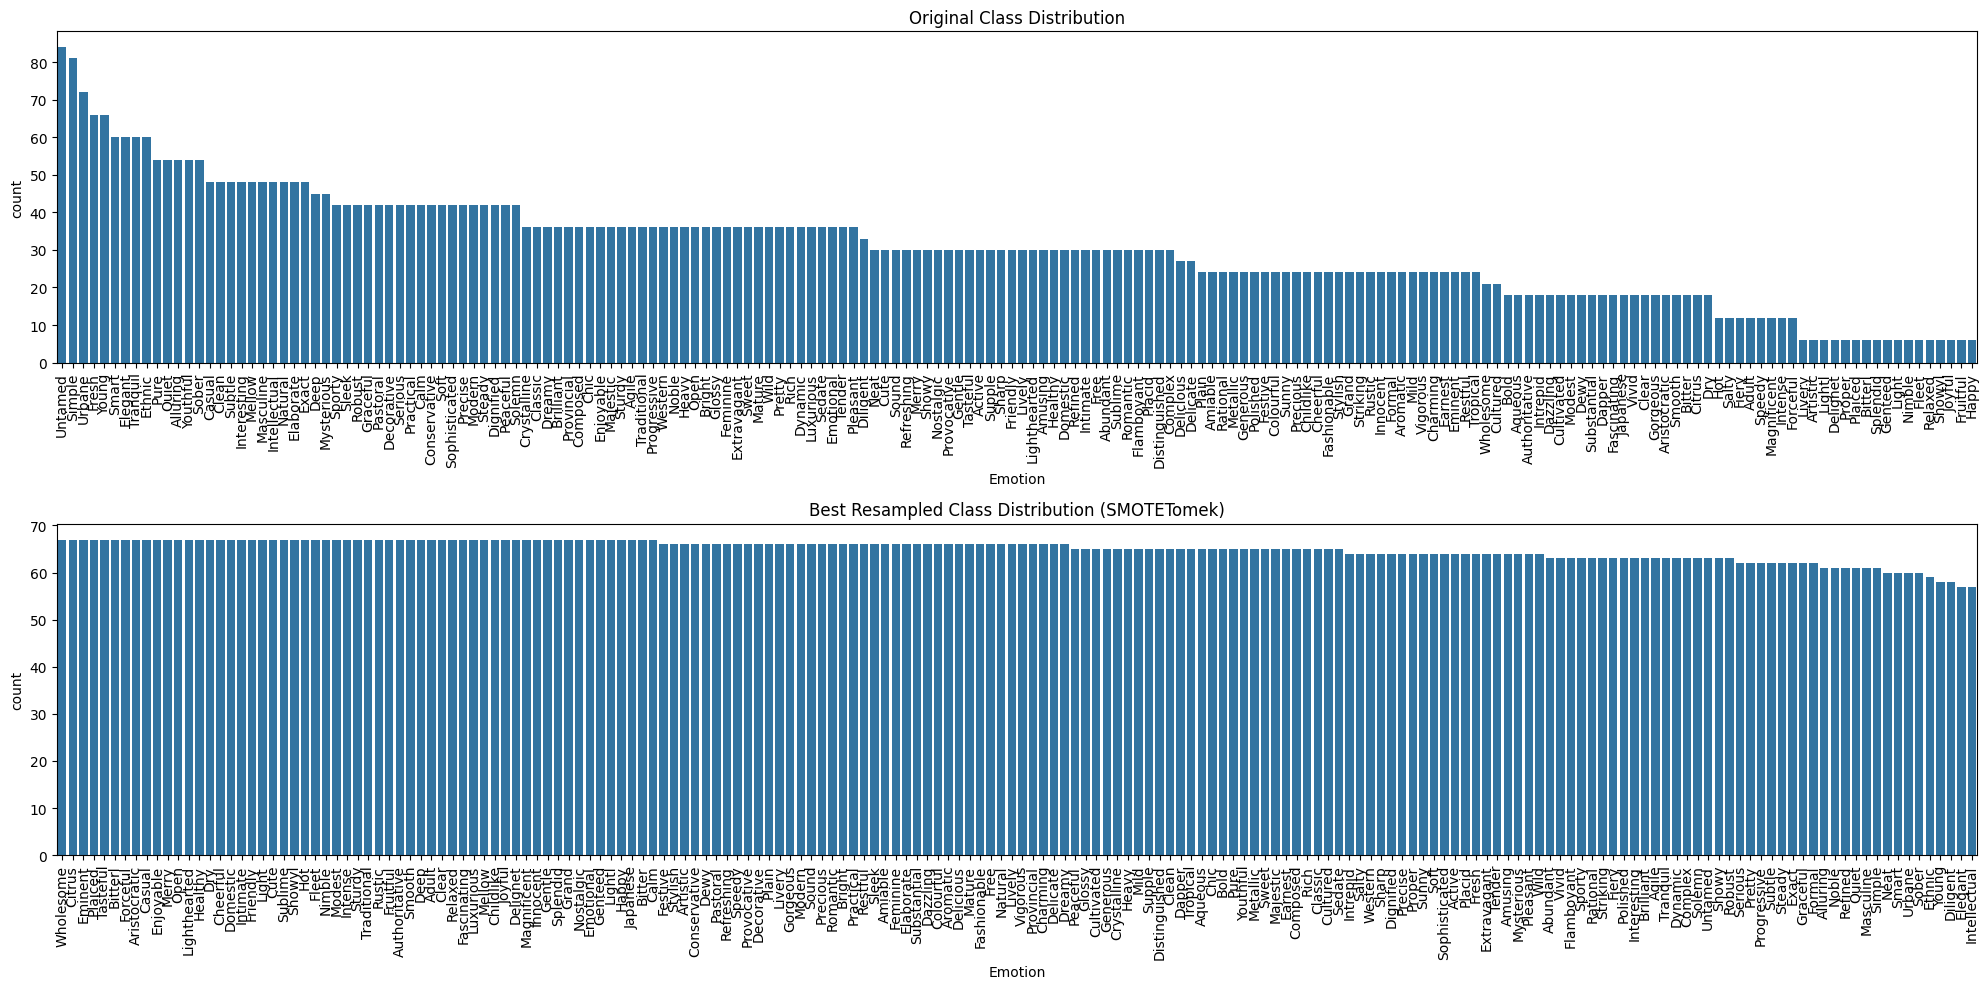


Resampling Statistics:
Original sample count: 5562
Resampled sample count: 11824
Sample increase: 6262 (112.59%)
Original number of classes: 182
Resampled number of classes: 182
Minimum class size before resampling: 6
Minimum class size after resampling: 57
Maximum class size before resampling: 84
Maximum class size after resampling: 67

Resampling complete. Check the generated CSV file and distribution plot.


In [17]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(min_count - 1, 5))

# Calculate the coefficient of variation to evaluate balance . It provides 
# a single number that represents how balanced the dataset is and lower values indicate a more balanced dataset 
def evaluate_balance(class_distribution):
    counts = list(class_distribution.values())
    return np.std(counts) / np.mean(counts)  # Coefficient of variation

# Load the dataset
df = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cross-Validation with Best Fold Selection 
# Choosing the best fold ensures we use the most balanced dataset for our final model
best_fold = None
best_balance = float('inf')
best_resampled_data = None
best_distribution = None

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features - we use StandardScaler here to normalize the feature values 
    # with this way it scales features to have zero mean and unit variance and this puts all features on a similar scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    print(f"Fold {fold}: Using k_neighbors = {k_neighbors}")

    # Apply SMOTETomek with adaptive handling
    # if an error occurs it falls back to SMOTE . The SMOTETomek might fail with very imbalanced datasets or with certain data distributions
    try:
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        smote_tomek = SMOTETomek(smote=smote, random_state=42)
        X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error in fold {fold}: {str(e)}")
        print("Falling back to SMOTE only")
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Evaluate balance
    resampled_distribution = Counter(y_resampled)
    balance_score = evaluate_balance(resampled_distribution)

    print(f"Fold {fold}: Balance Score = {balance_score:.4f}")
    print(f"Original samples: {len(y_train)}, Resampled samples: {len(y_resampled)}")
    print(f"Class distribution after resampling: {resampled_distribution}")

    if balance_score < best_balance:
        best_balance = balance_score
        best_fold = fold
        best_resampled_data = (X_resampled, y_resampled)
        best_distribution = resampled_distribution

# Process the best result
print(f"\nBest result achieved in Fold {best_fold}")
print("Original class distribution:")
print(Counter(y))
print("Resampled class distribution:")
print(best_distribution)
print(f"Best Balance Score: {best_balance:.4f}")

# Inverse transform the scaled features
X_resampled_original = scaler.inverse_transform(best_resampled_data[0])

# Create a DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled_original, columns=X.columns),
                          pd.Series(best_resampled_data[1], name='Emotion')], axis=1)

# Ensure all feature values are integers in the 0-255 range
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

# Save the best resampled dataset
df_resampled.to_csv('final_dataset_3.csv', index=False)

# Visualize class distribution
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Original Class Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=best_resampled_data[1], order=best_resampled_data[1].value_counts().index)
plt.title('Best Resampled Class Distribution (SMOTETomek)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution_smotetomek_best.png')
plt.show()

# Calculate and print some statistics
original_sample_count = len(y)
resampled_sample_count = len(best_resampled_data[1])
original_class_count = len(Counter(y))
resampled_class_count = len(best_distribution)

print("\nResampling Statistics:")
print(f"Original sample count: {original_sample_count}")
print(f"Resampled sample count: {resampled_sample_count}")
print(f"Sample increase: {resampled_sample_count - original_sample_count} ({(resampled_sample_count / original_sample_count - 1) * 100:.2f}%)")
print(f"Original number of classes: {original_class_count}")
print(f"Resampled number of classes: {resampled_class_count}")
print(f"Minimum class size before resampling: {min(Counter(y).values())}")
print(f"Minimum class size after resampling: {min(best_distribution.values())}")
print(f"Maximum class size before resampling: {max(Counter(y).values())}")
print(f"Maximum class size after resampling: {max(best_distribution.values())}")

print("\nResampling complete. Check the generated CSV file and distribution plot.")

### Use SMOTETomek implementation for Grouping dataset


Fold 1: Using k_neighbors = 3
Fold 1: Balance Score = 0.0189
Original samples: 4449, Resampled samples: 19072
Class distribution after resampling: Counter({'Bright': 108, 'Hot': 108, 'Forceful': 108, 'Untamed': 108, 'Glossy': 108, 'Joyful': 108, 'Colourful': 108, 'Sunny': 108, 'Feminine': 108, 'Charming': 108, 'Mild': 108, 'Calm': 108, 'Nostalgic': 108, 'Japanese': 108, 'Robust': 108, 'Fruitful': 108, 'Elaborate': 108, 'Enjoyable': 108, 'Delicious': 108, 'Aromatic': 108, 'Friendly': 108, 'Open': 108, 'Lighthearted': 108, 'Domestic': 108, 'Restful': 108, 'Dreamy': 108, 'Delicate': 108, 'Dry': 108, 'Wholesome': 108, 'Provincial': 108, 'Grand': 108, 'Sturdy': 108, 'Rustic': 108, 'Sound': 108, 'Intense': 108, 'Substantial': 108, 'Showyl': 108, 'Plain': 108, 'Tranquil': 108, 'Bitterl': 108, 'Tasteful': 108, 'Plaiced': 108, 'Traditional': 108, 'Bitter': 108, 'Artistic': 108, 'Citrus': 108, 'Steady': 108, 'Innocent': 108, 'Lightl': 108, 'Delignet': 108, 'Deep': 108, 'Solemn': 108, 'Livery': 1

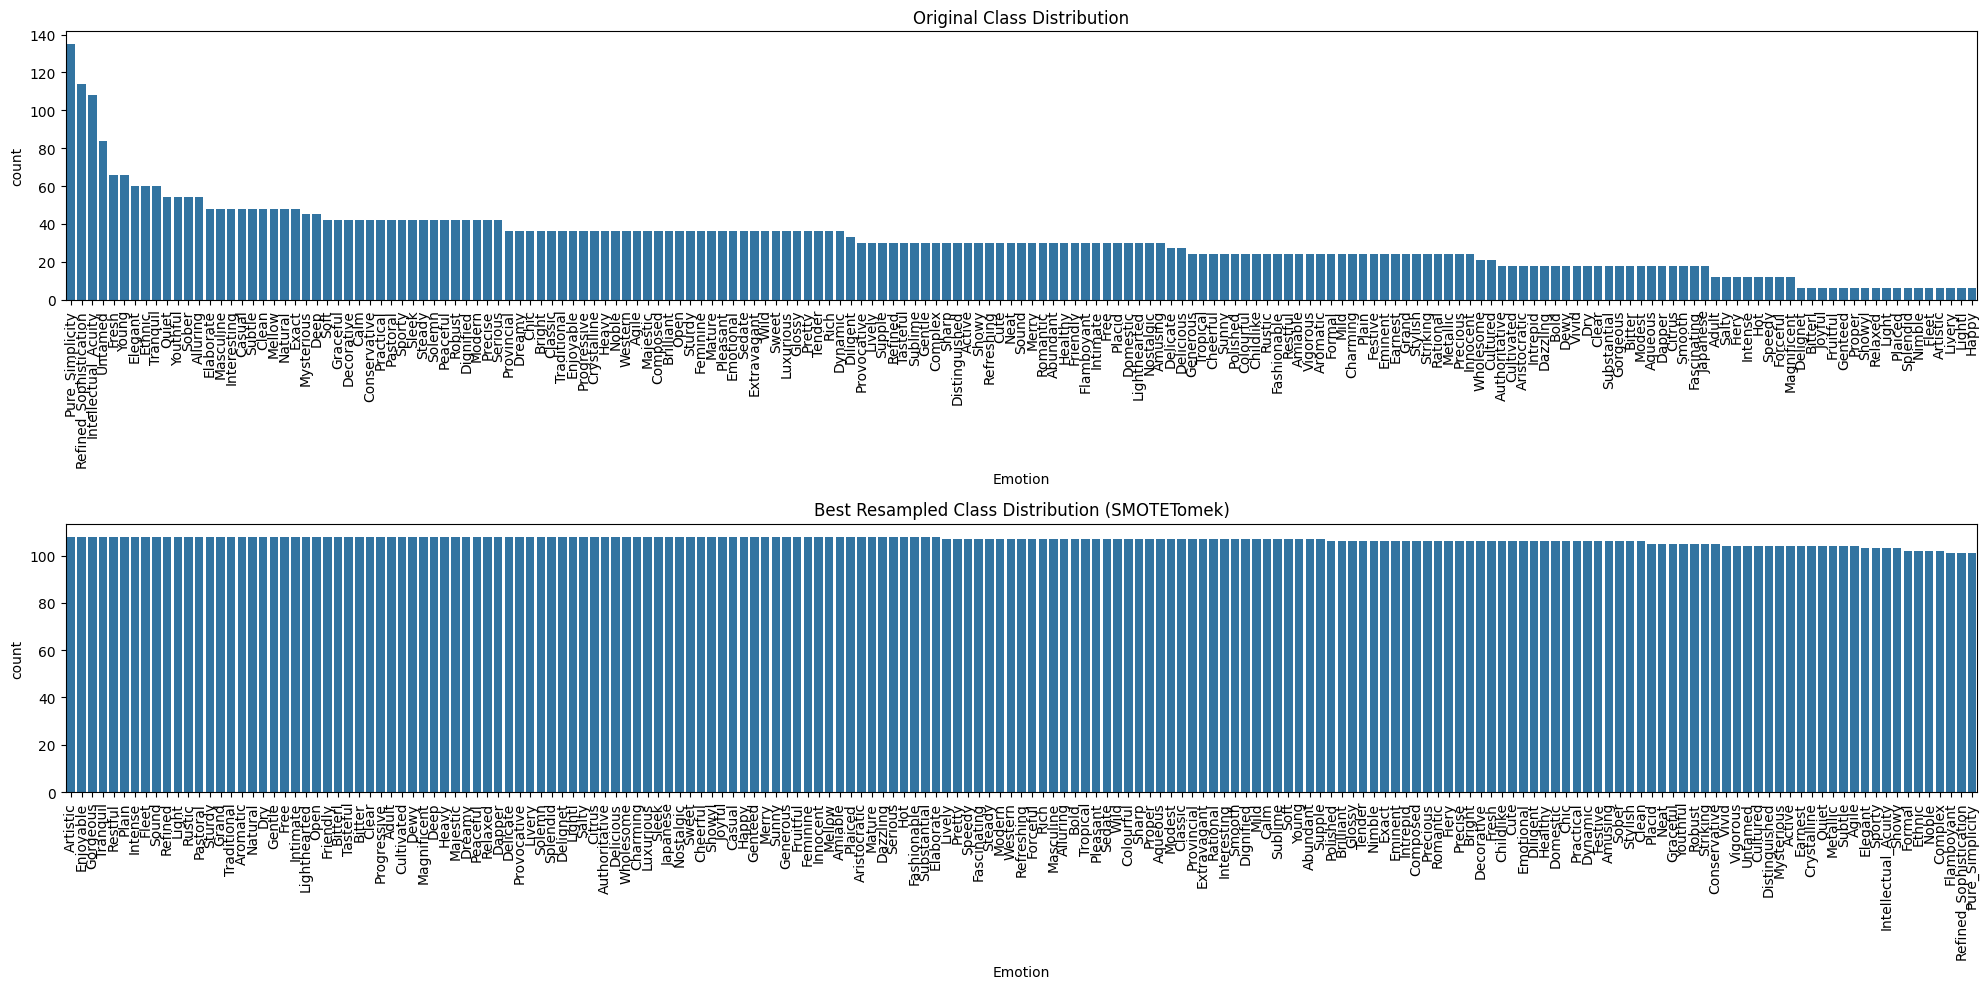


Resampling Statistics:
Original sample count: 5562
Resampled sample count: 19098
Sample increase: 13536 (243.37%)
Original number of classes: 179
Resampled number of classes: 179
Minimum class size before resampling: 6
Minimum class size after resampling: 101
Maximum class size before resampling: 135
Maximum class size after resampling: 108

Resampling complete. Check the generated CSV file and distribution plot.


In [2]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(min_count - 1, 5))

def evaluate_balance(class_distribution):
    counts = list(class_distribution.values())
    return np.std(counts) / np.mean(counts)  # Coefficient of variation

# Load the dataset
df = pd.read_csv('x6perfect_cleaned_grouping.csv')
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_fold = None
best_balance = float('inf')
best_resampled_data = None
best_distribution = None

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    print(f"Fold {fold}: Using k_neighbors = {k_neighbors}")

    # Apply SMOTETomek with adaptive handling
    try:
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        smote_tomek = SMOTETomek(smote=smote, random_state=42)
        X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error in fold {fold}: {str(e)}")
        print("Falling back to SMOTE only")
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Evaluate balance
    resampled_distribution = Counter(y_resampled)
    balance_score = evaluate_balance(resampled_distribution)

    print(f"Fold {fold}: Balance Score = {balance_score:.4f}")
    print(f"Original samples: {len(y_train)}, Resampled samples: {len(y_resampled)}")
    print(f"Class distribution after resampling: {resampled_distribution}")

    if balance_score < best_balance:
        best_balance = balance_score
        best_fold = fold
        best_resampled_data = (X_resampled, y_resampled)
        best_distribution = resampled_distribution

# Process the best result
print(f"\nBest result achieved in Fold {best_fold}")
print("Original class distribution:")
print(Counter(y))
print("Resampled class distribution:")
print(best_distribution)
print(f"Best Balance Score: {best_balance:.4f}")

# Inverse transform the scaled features
X_resampled_original = scaler.inverse_transform(best_resampled_data[0])

# Create a DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled_original, columns=X.columns),
                          pd.Series(best_resampled_data[1], name='Emotion')], axis=1)

# Ensure all feature values are integers in the 0-255 range
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

# Save the best resampled dataset
df_resampled.to_csv('final_dataset_3_grouping.csv', index=False)

# Visualize class distribution
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Original Class Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=best_resampled_data[1], order=best_resampled_data[1].value_counts().index)
plt.title('Best Resampled Class Distribution (SMOTETomek)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution_smotetomek_best.png')
plt.show()

# Calculate and print some statistics
original_sample_count = len(y)
resampled_sample_count = len(best_resampled_data[1])
original_class_count = len(Counter(y))
resampled_class_count = len(best_distribution)

print("\nResampling Statistics:")
print(f"Original sample count: {original_sample_count}")
print(f"Resampled sample count: {resampled_sample_count}")
print(f"Sample increase: {resampled_sample_count - original_sample_count} ({(resampled_sample_count / original_sample_count - 1) * 100:.2f}%)")
print(f"Original number of classes: {original_class_count}")
print(f"Resampled number of classes: {resampled_class_count}")
print(f"Minimum class size before resampling: {min(Counter(y).values())}")
print(f"Minimum class size after resampling: {min(best_distribution.values())}")
print(f"Maximum class size before resampling: {max(Counter(y).values())}")
print(f"Maximum class size after resampling: {max(best_distribution.values())}")

print("\nResampling complete. Check the generated CSV file and distribution plot.")

### Ο λόγος για αυτήν την αφαίρεση είναι ότι αυτές οι λέξεις δεν συμβάλλουν στην κατανόηση του συναισθηματικού αντίκτυπου ενός πίνακα.

Με άλλα λόγια, όταν περιγράφουμε ένα έργο τέχνης, θέλουμε να εστιάσουμε σε λέξεις που προκαλούν συναισθήματα ή που μας βοηθούν να κατανοήσουμε πώς μας κάνει να αισθανόμαστε ο πίνακας. Οι λέξεις που αναφέρονται σε αυτό το τμήμα κειμένου, όπως "καθαρός", "ακριβής", "πρακτικός", κ.λπ., θεωρούνται είτε πολύ τεχνικές, πολύ συγκεκριμένες ή απλά άσχετες με την περιγραφή των συναισθημάτων ή των οπτικών ιδιοτήτων στην τέχνη.

Japanese, Aqueous, Sober, Sound, Showyl, Plaiced, Delignet, Livery, Western, Urbane, Dewy, Exact, Salty because these terms are too specific, redundant, or not directly related to emotions or visual qualities in art:

- Smart: Consider removing. Not typically used to describe emotional qualities in art.
- Clean: Consider removing. More about visual tidiness than emotion.
- Exact: Remove. Doesn't describe emotional qualities in art.
- Practical: Remove. Not related to emotional expression in art.
- Sporty: Remove. Not typically used to describe emotions in art.
- Efficient: Remove. Not related to emotional expression in art.
- Technical: Remove. Describes skill rather than emotion.
- Functional: Remove. Not related to emotional qualities in art.
- Durable: Remove. Describes physical quality, not emotion.
- Convenient: Remove. Not relevant to emotional expression in art.
- Precise: Remove. More about technique than emotion.
- Handy: Remove. Not related to artistic emotional expression.
- Professional: Consider removing. More about execution than emotion, though it could imply a polished feel.
- Steady: Consider removing. While it could describe consistent emotional tone, it's not commonly used in art description.
- Proper: Consider removing. More about correctness than emotion, though it could imply formality.


In [4]:
import pandas as pd

# Read the original CSV file
data4 = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned.csv')

# List of emotions to remove
emotions_to_remove = [
    "Japanese", "Aqueous", "Sober", "Sound", "Showyl", "Plaiced", "Delignet", 
    "Livery", "Western", "Urbane", "Dewy", "Exact", "Salty", "Smart", "Clean", 
    "Practical", "Sporty", "Efficient", "Technical", "Functional", "Durable", 
    "Convenient", "Precise", "Handy", "Professional", "Steady", "Proper"
]

# Remove rows with the specified emotions
data_cleaned = data4[~data4['Emotion'].isin(emotions_to_remove)]

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned_remove.csv', index=False)

# Count the number of occurrences of each distinct emotion
emotion_counts = data_cleaned['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data_cleaned['Emotion'].nunique()

# Get the names of distinct emotions
distinct_emotions = data_cleaned['Emotion'].unique()

print("\nNumber of distinct emotions:")
print(distinct_emotion_count)

print("\nNames of distinct emotions:")
for emotion in distinct_emotions:
    print(emotion)

print("\nFirst few rows of emotion counts:")
print(emotion_counts.head())

print(f"\nTotal rows in original dataset: {len(data4)}")
print(f"Total rows in cleaned dataset: {len(data_cleaned)}")
print(f"Rows removed: {len(data4) - len(data_cleaned)}")

Counts of each emotion:
Emotion
Untamed     84
Simple      81
Young       66
Fresh       66
Elegant     60
            ..
Splendid     6
Genteed      6
Relaxed      6
Joyful       6
Happy        6
Name: count, Length: 162, dtype: int64

Number of distinct emotions:
162

Names of distinct emotions:
Bright
Festive
Lively
Hot
Vigorous
Bold
Forceful
Dynamic
Rich
Mature
Alluring
Untamed
Glossy
Fascinating
Luxurious
Mellow
Sweet
Cheerful
Childlike
Joyful
Merry
Colourful
Pretty
Sunny
Generous
Cute
Feminine
Amiable
Innocent
Smooth
Gentle
Supple
Soft
Charming
Mild
Genteed
Pleasant
Tender
Emotional
Casual
Graceful
Calm
Sedate
Nostalgic
Elegant
Sleek
Interesting
Diligent
Extravagant
Ethnic
Robust
Fruitful
Elaborate
Substantial
Wild
Serious
Dazzling
Flamboyant
Abundant
Tropical
Enjoyable
Delicious
Aromatic
Friendly
Open
Lighthearted
Amusing
Healthy
Domestic
Restful
Intimate
Free
Dreamy
Delicate
Dry
Natural
Wholesome
Provincial
Placid
Modest
Chic
Classic
Traditional
Grand
Pastoral
Sturdy
Rustic
Con

### Now use SMOTETomek to oversapmple the new "removed" dataset


Fold 1: Using k_neighbors = 3
Fold 1: Balance Score = 0.0172
Original samples: 3960, Resampled samples: 17170
Class distribution after resampling: Counter({'Bright': 108, 'Hot': 108, 'Forceful': 108, 'Mature': 108, 'Alluring': 108, 'Glossy': 108, 'Mellow': 108, 'Joyful': 108, 'Festive': 108, 'Colourful': 108, 'Sunny': 108, 'Generous': 108, 'Feminine': 108, 'Charming': 108, 'Calm': 108, 'Nostalgic': 108, 'Sleek': 108, 'Diligent': 108, 'Fruitful': 108, 'Substantial': 108, 'Dazzling': 108, 'Open': 108, 'Lighthearted': 108, 'Restful': 108, 'Dreamy': 108, 'Delicate': 108, 'Natural': 108, 'Wholesome': 108, 'Modest': 108, 'Traditional': 108, 'Pastoral': 108, 'Sturdy': 108, 'Rustic': 108, 'Conservative': 108, 'Intense': 108, 'Plain': 108, 'Gorgeous': 108, 'Bitterl': 108, 'Tasteful': 108, 'Bitter': 108, 'Quiet': 108, 'Artistic': 108, 'Citrus': 108, 'Innocent': 108, 'Lightl': 108, 'Deep': 108, 'Splendid': 108, 'Provocative': 108, 'Relaxed': 108, 'Progressive': 108, 'Clear': 108, 'Fashionable': 1

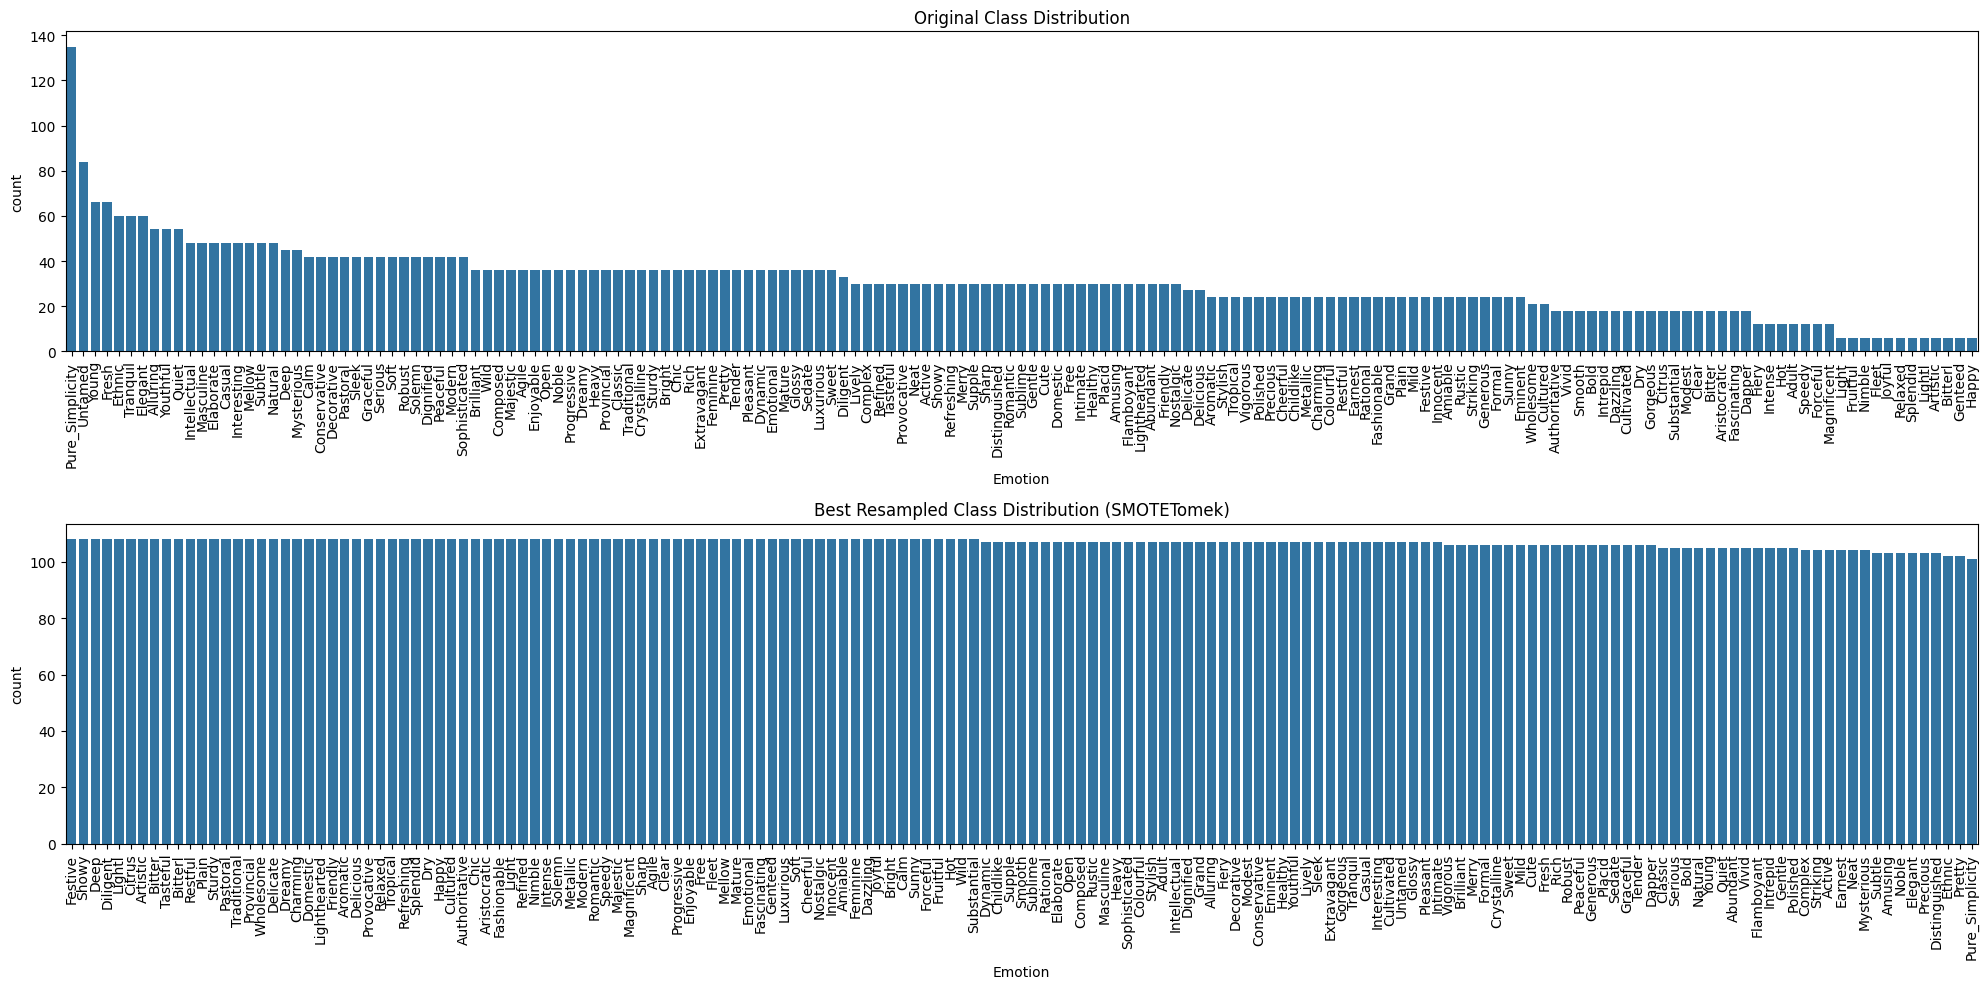


Resampling Statistics:
Original sample count: 4950
Resampled sample count: 17204
Sample increase: 12254 (247.56%)
Original number of classes: 161
Resampled number of classes: 161
Minimum class size before resampling: 6
Minimum class size after resampling: 101
Maximum class size before resampling: 135
Maximum class size after resampling: 108

Resampling complete. Check the generated CSV file and distribution plot.


In [7]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(min_count - 1, 5))

def evaluate_balance(class_distribution):
    counts = list(class_distribution.values())
    return np.std(counts) / np.mean(counts)  # Coefficient of variation

# Load the dataset
df = pd.read_csv('x6perfect_cleaned_remove.csv')
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_fold = None
best_balance = float('inf')
best_resampled_data = None
best_distribution = None

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    print(f"Fold {fold}: Using k_neighbors = {k_neighbors}")

    # Apply SMOTETomek with adaptive handling
    try:
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        smote_tomek = SMOTETomek(smote=smote, random_state=42)
        X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error in fold {fold}: {str(e)}")
        print("Falling back to SMOTE only")
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Evaluate balance
    resampled_distribution = Counter(y_resampled)
    balance_score = evaluate_balance(resampled_distribution)

    print(f"Fold {fold}: Balance Score = {balance_score:.4f}")
    print(f"Original samples: {len(y_train)}, Resampled samples: {len(y_resampled)}")
    print(f"Class distribution after resampling: {resampled_distribution}")

    if balance_score < best_balance:
        best_balance = balance_score
        best_fold = fold
        best_resampled_data = (X_resampled, y_resampled)
        best_distribution = resampled_distribution

# Process the best result
print(f"\nBest result achieved in Fold {best_fold}")
print("Original class distribution:")
print(Counter(y))
print("Resampled class distribution:")
print(best_distribution)
print(f"Best Balance Score: {best_balance:.4f}")

# Inverse transform the scaled features
X_resampled_original = scaler.inverse_transform(best_resampled_data[0])

# Create a DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled_original, columns=X.columns),
                          pd.Series(best_resampled_data[1], name='Emotion')], axis=1)

# Ensure all feature values are integers in the 0-255 range
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

# Save the best resampled dataset
df_resampled.to_csv('final_dataset_3_remove.csv', index=False)

# Visualize class distribution
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Original Class Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=best_resampled_data[1], order=best_resampled_data[1].value_counts().index)
plt.title('Best Resampled Class Distribution (SMOTETomek)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution_smotetomek_best.png')
plt.show()

# Calculate and print some statistics
original_sample_count = len(y)
resampled_sample_count = len(best_resampled_data[1])
original_class_count = len(Counter(y))
resampled_class_count = len(best_distribution)

print("\nResampling Statistics:")
print(f"Original sample count: {original_sample_count}")
print(f"Resampled sample count: {resampled_sample_count}")
print(f"Sample increase: {resampled_sample_count - original_sample_count} ({(resampled_sample_count / original_sample_count - 1) * 100:.2f}%)")
print(f"Original number of classes: {original_class_count}")
print(f"Resampled number of classes: {resampled_class_count}")
print(f"Minimum class size before resampling: {min(Counter(y).values())}")
print(f"Minimum class size after resampling: {min(best_distribution.values())}")
print(f"Maximum class size before resampling: {max(Counter(y).values())}")
print(f"Maximum class size after resampling: {max(best_distribution.values())}")

print("\nResampling complete. Check the generated CSV file and distribution plot.")

### Possible to be a mistake but i'm trying to oversample even more samples


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(min_count - 1, 5))

# with this function we create a strategy to oversample all classes to a level higher 
# than the original majority class. The multiplier parameter allows for aggressive oversampling
def custom_sampling_strategy(y, multiplier=2):
    class_counts = Counter(y)
    max_count = max(class_counts.values())
    return {cls: int(max_count * multiplier) for cls in class_counts}

# Load and preprocess the dataset
df = pd.read_csv('x6perfect_cleaned_grouping.csv')
df.drop_duplicates(inplace=True)

X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Stratified K-Fold cross-validation 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation with Best Fold Selection
best_resampled_data = None
max_samples = 0

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    
    # Custom sampling strategy
    sampling_strategy = custom_sampling_strategy(y_train, multiplier=3)

    # Apply Mutliple Oversampling Techniques 
    try:
        # SMOTE creates synthetic samples along the line between minority class samples
        smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)
        X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
        
        # ADASYN focuses more on creating samples near the boundary between classes
        adasyn = ADASYN(sampling_strategy='auto', n_neighbors=k_neighbors, random_state=42)
        X_adasyn, y_adasyn = adasyn.fit_resample(X_smote, y_smote)
        
        # I use both in order to create a richer, more diverse set of synthetic samples
                
        X_resampled, y_resampled = X_adasyn, y_adasyn  # If not using TomekLinks
    except ValueError as e:
        print(f"Error in fold {fold}: {str(e)}")
        print("Falling back to SMOTE only")
        smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

    print(f"Fold {fold}: Original samples: {len(y_train)}, Resampled samples: {len(y_resampled)}")
    
    if len(y_resampled) > max_samples:
        max_samples = len(y_resampled)
        best_resampled_data = (X_resampled, y_resampled)

# Process the best result
print("\nBest result:")
print(f"Original sample count: {len(y)}")
print(f"Resampled sample count: {len(best_resampled_data[1])}")
print(f"Sample increase: {len(best_resampled_data[1]) - len(y)} ({(len(best_resampled_data[1]) / len(y) - 1) * 100:.2f}%)")

# Save the best resampled dataset
df_resampled = pd.concat([
    pd.DataFrame(scaler.inverse_transform(best_resampled_data[0]), columns=X.columns),
    pd.Series(best_resampled_data[1], name='Emotion')
], axis=1)

# Ensure all feature values are integers in the 0-255 range
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

df_resampled.to_csv('final_dataset_increased_samples.csv', index=False)

print("\nResampling complete. Check the generated CSV file for the increased dataset.")

Fold 1: Original samples: 4449, Resampled samples: 57996
Fold 2: Original samples: 4449, Resampled samples: 57996
Fold 3: Original samples: 4450, Resampled samples: 57996
Fold 4: Original samples: 4450, Resampled samples: 57996
Fold 5: Original samples: 4450, Resampled samples: 57996

Best result:
Original sample count: 5562
Resampled sample count: 57996
Sample increase: 52434 (942.72%)

Resampling complete. Check the generated CSV file for the increased dataset.
